# Классификация движения фехтовальщика

В исследовании участвовал здоровый фехтовальщик доброволец в возрасте 20 лет, имеющий звание кандидат мастера спорта России по фехтованию. Доброволец профессионально занимался спортом на протяжении 6 лет на момент проведения исследова-ния, а именно тренировался 4-5 раз в неделю и участвовал во всероссийских и международных соревнованиях. Спортсмен является правшой. 

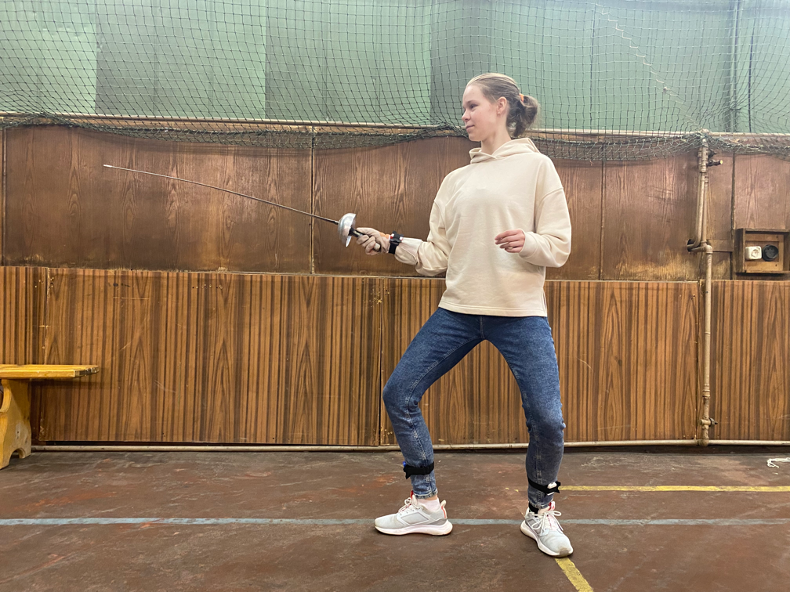

В данной исследовательской работе в качестве датчиков использовалась исследователь-ская беспроводная система Нейротех Колибри. Она систему состоит из четырех универсальных беспроводных датчиков "Колибри", которые выполняют регистрацию ЭМГ, акселерометра и гироскопа. Система сотрудничает с программным обеспечением БОС Кине-зис. Передача данных на ПК происходит с использованием интерфейса USB.
 

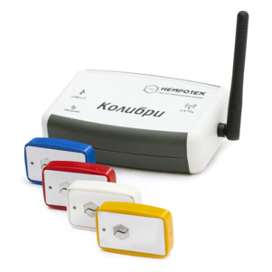

Во время исследования фехтовальщик сделал базовые для данного вида спорта дей-ствия: укол одной рукой, закрытие руки, укол шагом вперед, закрытие шагом назад, укол выпадом и закрытие назад из выпада.

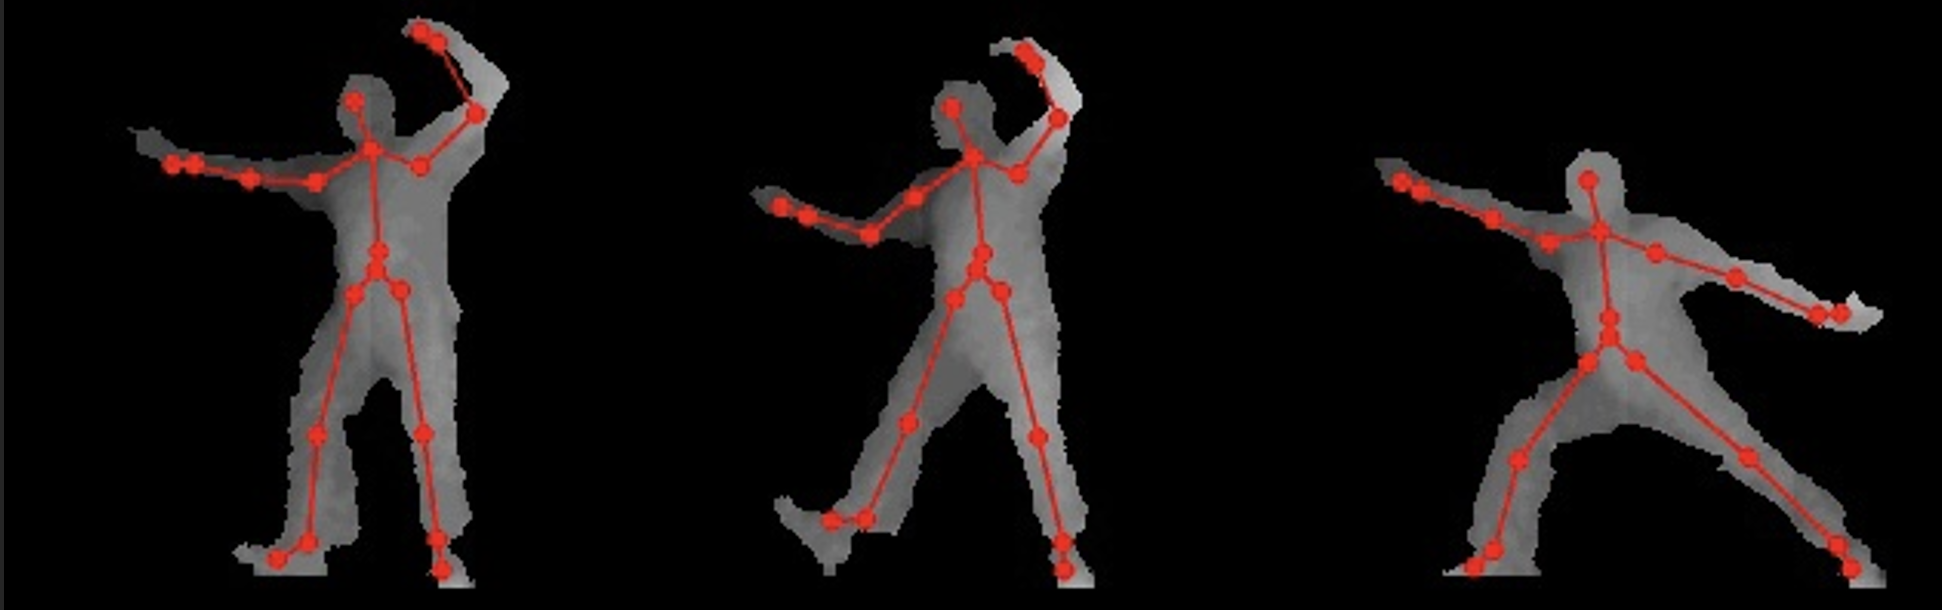

На добровольце были закреплены датчики гироскопа на значимых для описания дви-жения точках: на запястье ведущей руки (правой), на корпусе в области грудно-го отдела спины, на голенях обеих ног.

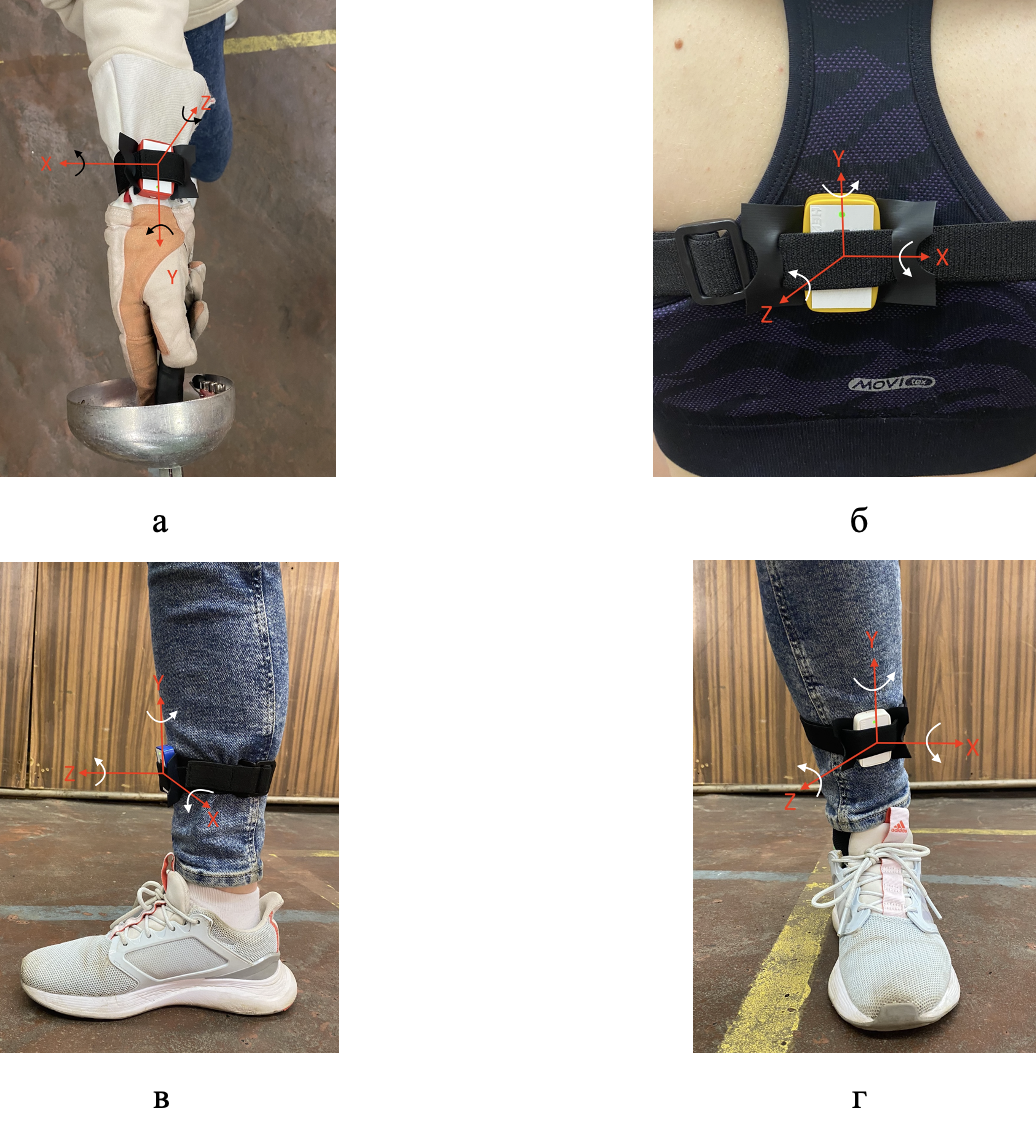

In [1]:
# путь к папке fencing_signals
way_folder = 'fencing_signals/'

#частота дискритизации устройства
fs = 100

#части тела, к которым закреплены датчики
body_part = ["передней руке", "груди", "передней ноге", "задней ноге"]

#выполняемые действия
fencing_move = ['рука', 'шаг', 'выпад']

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tabulate import tabulate
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Опишем используемые функции

In [3]:
def read_data(file_names, column_names):
    """Чтение записанных данных"""
    
    dfs = []
    for file_name, column_name in zip(file_names, column_names):
        df = pd.read_csv(file_name, header=None, delimiter="\t", decimal=",", comment=";", names=[column_name])
        df_rounded = df.round(2)
        dfs.append(df_rounded)
    
    dfs_concated = []
    for i in range(4):
        df = pd.concat([dfs[i], dfs[i + 4], dfs[i + 8]], axis=1)
        dfs_concated.append(df)
    return dfs_concated



def get_folder(action: str, variant: int):
    """Разделение сигнала на отдельные 6 классов по 10 движений""" 
    
    if action == 'рука':
        if variant == 1:
            folder = 'Arm/10_actions1/'
            way = ' вперед'
            start = [176, 425, 692, 933, 1180, 1416, 1643, 1875, 2165, 2394]
            stop = [235, 470, 737, 991, 1241, 1486, 1709, 1921, 2211, 2443]
            return folder, way, start, stop
        if variant == 2:
            folder = 'Arm/10_actions1/'
            way = ' назад'
            start = [294, 539, 810, 1056, 1292, 1520, 1736, 1988, 2291, 2500]
            stop = [348, 616, 880, 1118, 1336, 1549, 1786, 2018, 2352, 2539]
            return folder, way, start, stop
    elif action == 'шаг':
        if variant == 1:
            folder = 'Step/10_actions1/'
            way = ' вперед'
            start = [310, 717, 1075, 1445, 1793, 2142, 2482, 2808, 3159, 3500]
            stop = [460, 852, 1221, 1573, 1942, 2290, 2635, 2970, 3301, 3657]
            return folder, way, start, stop
        if variant == 2:
            folder = 'Step/10_actions1/'
            way = ' назад'
            start = [525, 912, 1291, 1631, 1992, 2337, 2664, 3003, 3348, 3681]
            stop = [650, 1040, 1395, 1737, 2105, 2469, 2798, 3122, 3470, 3840]
            return folder, way, start, stop
    elif action == 'выпад':
        if variant == 1:
            folder = 'Lunge/10_actions1/'
            way = ' вперед'
            start = [496, 1120, 1704, 2143, 2692, 3120, 3659, 4156, 4641]
            stop = [708, 1311, 1872, 2339, 2870, 3310, 3829, 4352, 4838]
            return folder, way, start, stop
        if variant == 2:
            folder = 'Lunge/10_actions1/'
            way = ' назад'
            start = [848, 1383, 1914, 2476, 2900, 3440, 3940, 4458, 4906]
            stop = [1059, 1606, 2110, 2676, 3080, 3628, 4132, 4635, 5129]
            return folder, way, start, stop

        

def creation_of_dfs(way_folder, folder):
    """Создание датафреймов с данными гироскопа по осям"""
    
    folder_path = f"{way_folder}{folder}CSV_Export"
    file_names = ["Hyro Y_9.csv", "Hyro X_11.csv", "Hyro Z_16.csv", "Hyro X_17.csv", 
                  "Hyro X_8.csv", "Hyro Z_13.csv", "Hyro X_14.csv", "Hyro Z_19.csv",
                  "Hyro Z_10.csv", "Hyro Y_12.csv", "Hyro Y_15.csv", "Hyro Y_18.csv"]
    
    file_paths = [os.path.join(folder_path, file_name) for file_name in file_names]
    column_names = ["x", "x", "x", "x", "y", "y", "y", "y", "z", "z", "z", "z"]   
    dfs = read_data(file_paths, column_names)
    
    #при записи сигналов датчики были закреплены в определнных позициях, 
    #чтобы система координат для всех датчиков была одна: 
    # x вперед: 1 - вперед y, 2 - вперед x, 3 - вперед z, 4 - назад x (!изменить!)
    # y вправо: 1 - вправо x, 2 - вправо z, 3 -  влево x (!изменить!), 4 - влево z (!изменить!)
    # z вверх 1 - вверх z, 2 - вверх y, 3 - вверх y, 4 - вверх y
    
    dfs[3]['x'] = dfs[3]['x'].apply(np.negative)
    dfs[2]['y'] = dfs[2]['y'].apply(np.negative)
    dfs[3]['y'] = dfs[3]['y'].apply(np.negative)
    return dfs
    

     
def plot_dfs(dfs, part, body_part, save=False):
    """Вывод изображений"""
    
    fig = plt.figure(figsize=(15, 10))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.plot(df['t'], df['x'], color='red', label='X')
        ax.plot(df['t'], df['y'], color='blue', label='Y')
        ax.plot(df['t'], df['z'], color='darkgreen', label='Z')
        ax.set_title(f'Сенсор закреплен на {body_part[i]}', fontsize=16)
        ax.set_ylabel('Гироскоп', fontsize=12)
        ax.grid(which='major', linewidth=0.5, linestyle=':', color='k')
        ax.set_xlabel('Время, c', fontsize=12)
        ax.autoscale(enable=True, axis='both')
        plt.legend()
    fig.suptitle(f'Движение: {part}', fontsize=20)
    plt.tight_layout()
    if save == True:
        plt.savefig(f'{part}.png', dpi=400)
    plt.show()

def print_dfs(dfs, part, body_part):
    """"Вывод датафреймов"""
    
    for i, df in enumerate(dfs):
        print(f'Движение: {part}. Сенсор закреплен на {body_part[i]}')
        print(tabulate(df.head(), headers='keys', tablefmt='pretty'))
        print('\n') 
    
    

def movement(dfs, start, stop):
    """Разделение сигнала на отдельные движения"""
    movement_dfs = []
    for df in dfs:
        movement_dfs.append(df[['x', 'y', 'z', 't']][start:stop])
    return movement_dfs



def features(dfs, part, body_part):
    """Определение характеристик и вывод их в отдельный датафрейм"""
    
    # Словарь для перевода названий статистик
    translation_dict = {
        'count': 'Отсчеты',
        'mean': 'Среднее',
        'std': 'Стандартное отклонение',
        'min': 'Минимум',
        '25%': '25-й процентиль',
        '50%': 'Медиана',
        '75%': '75-й процентиль',
        'max': 'Максимум'
    }


    features_df = []
    for df in dfs:
        # Создадим датафрейм со стандартными статистическими характеристиками 
        feature_df = ((df.iloc[:, :3].describe()).round(1)).T.rename(columns=translation_dict)

        # Добавим маркеры
        feature_df['Класс'] = ' '.join(part.split()[:2])
        
        features_df.append(feature_df)

    # Объединим все датафреймы в один большой датафрейм
    combined_df = pd.concat(features_df)
    combined_df = combined_df.groupby('Класс').agg(lambda x: x.sum() if x.name not in ['Отсчеты', 'Класс'] else x.iloc[0])
    return combined_df



def evaluate_preds(true_values, pred_values, labels, save=False):
    """Оценка качества модели и график preds vs true"""
    
    plt.figure(figsize=(6,4))
    plt.scatter(pred_values, true_values, color='green') 
    plt.xlabel('Предсказанные значения', fontsize=14)
    plt.ylabel('Фактические значения', fontsize=14)
    plt.title('Фактические и предсказанные значения', fontsize=16)
    plt.grid(which='major', linewidth=0.5, linestyle=':', color='k')
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=8)
    
    # Подсчет количества точек с одинаковыми координатами
    point_counts = {}
    for i in range(len(true_values)):
        x, y = pred_values[i], true_values[i]
        if (x, y) in point_counts:
            point_counts[(x, y)] += 1
        else:
            point_counts[(x, y)] = 1
    for i in point_counts:
        plt.text(i[0], i[1], f' {point_counts[i]}', fontsize=10, color='blue')
    
    # Аннотация с текстом
    plt.annotate('Количество точек с одинаковыми координатами', xy=(0.05, 0.95), xytext=(0.025, 0.875), xycoords='axes fraction',
                 fontsize=10, color='blue',
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    
    if save == True:
        plt.savefig(f'{true_values} vs {pred_values}.png', dpi=400)
    plt.show()


# Просмотрим и проанализируем данные

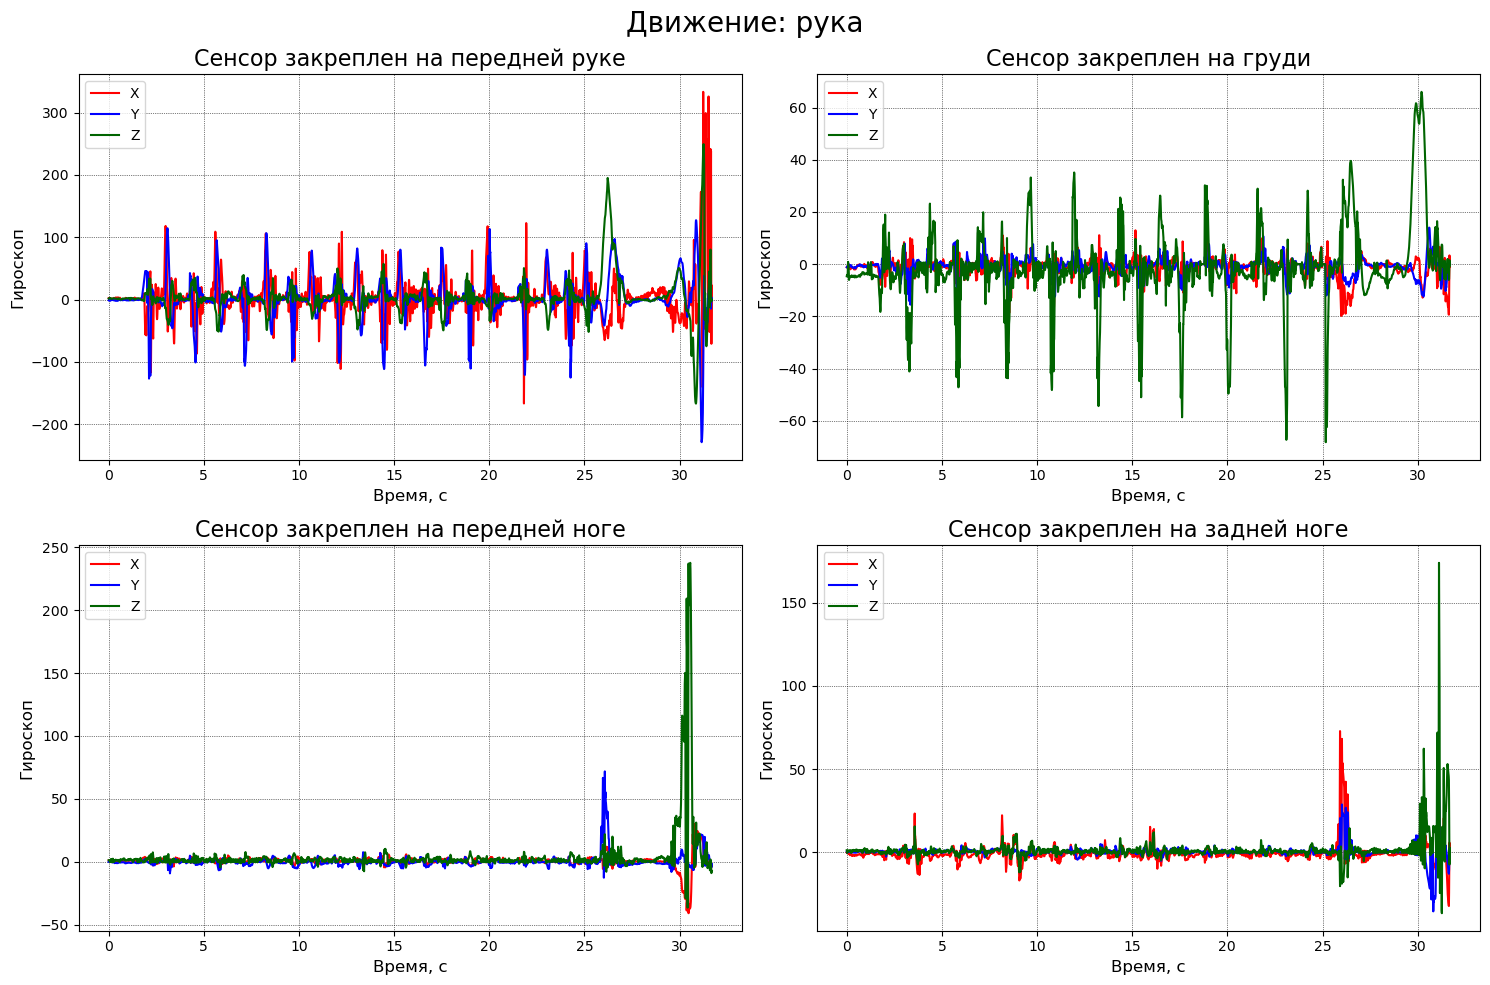

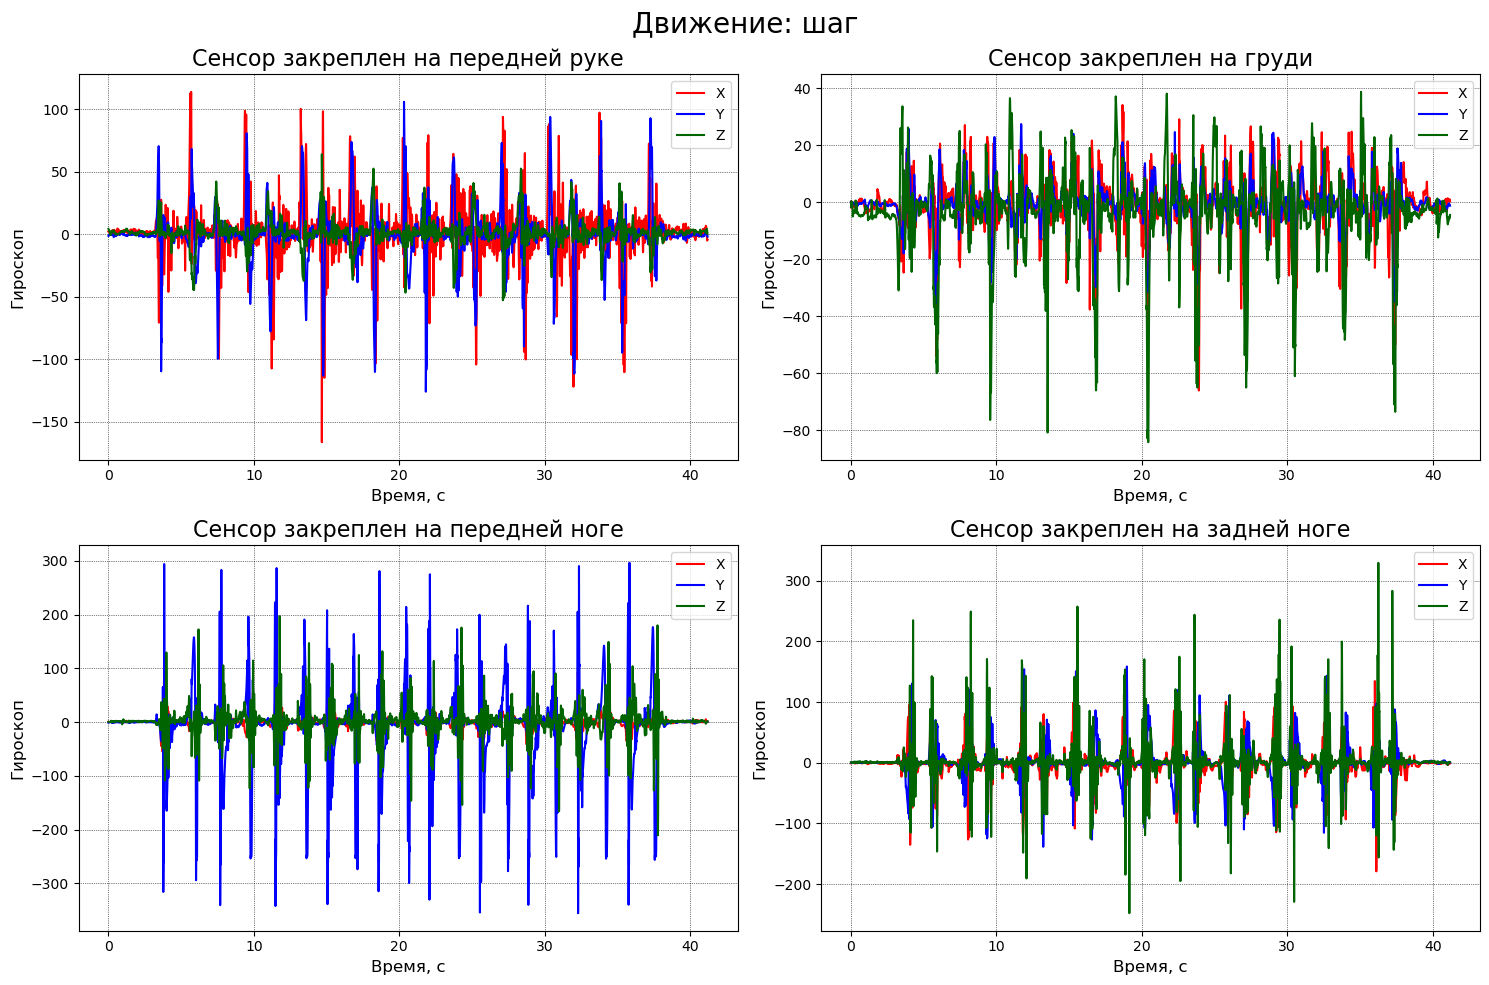

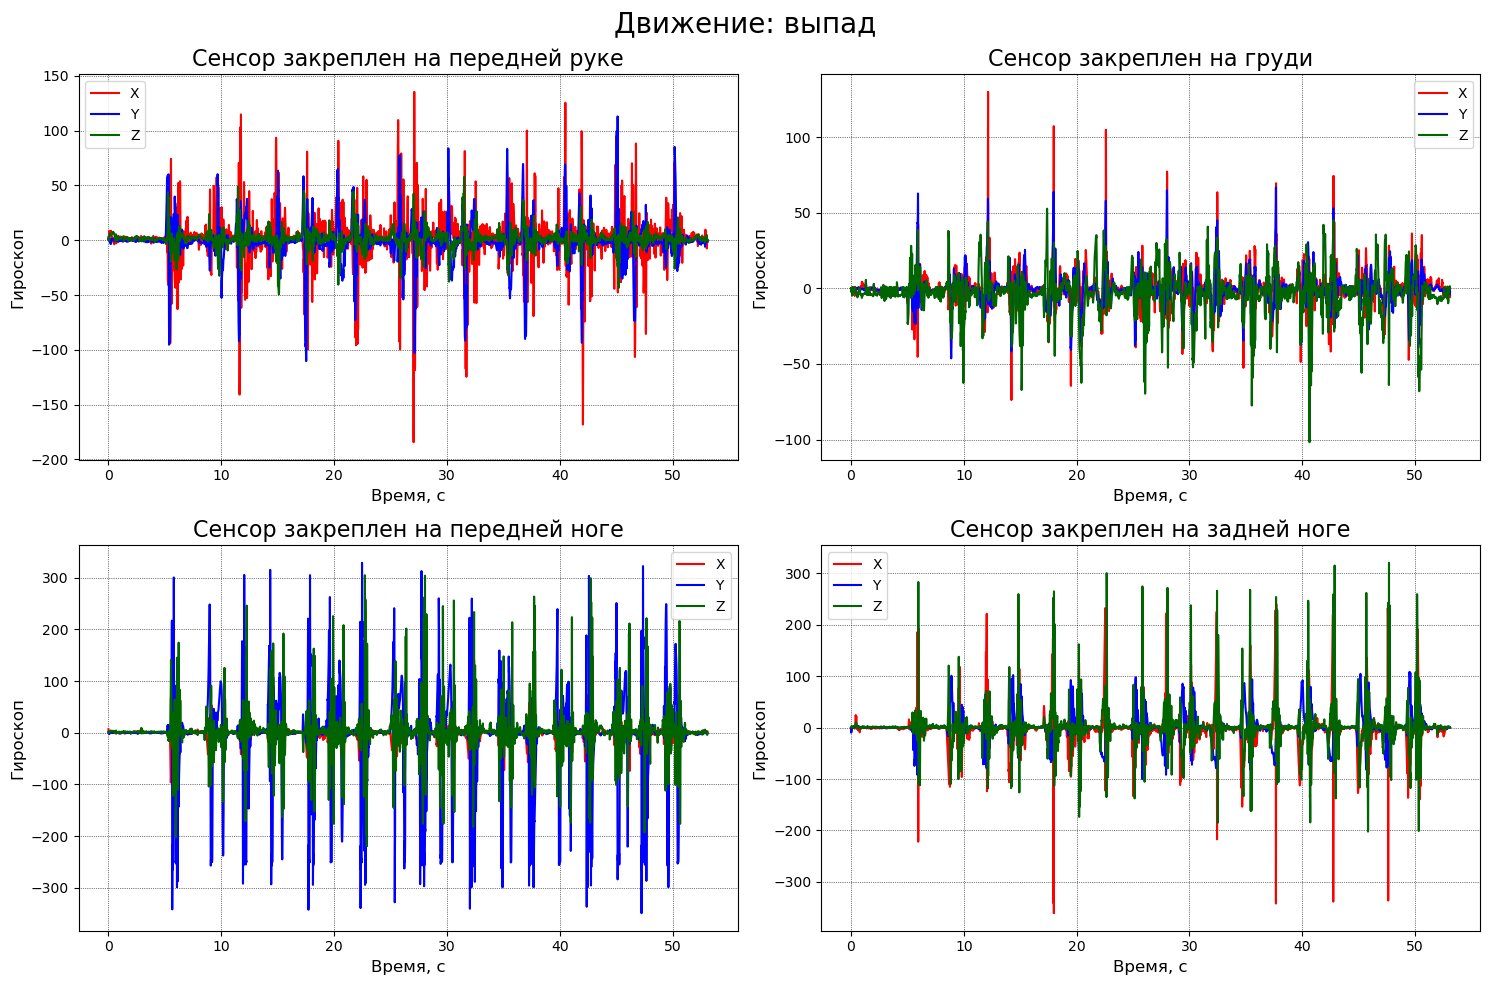

In [4]:
for part in fencing_move:
    
    folder = get_folder(part, 1)[0]
    dfs = creation_of_dfs(way_folder, folder)
    
    # Создаем отсчет времени, зная частоту дискретизации устройства
    t = np.arange(len(dfs[0]['x'])) / fs
    for df in dfs:
            df['t'] = t
            
    plot_dfs(dfs, part, body_part)

# Обработаем данные

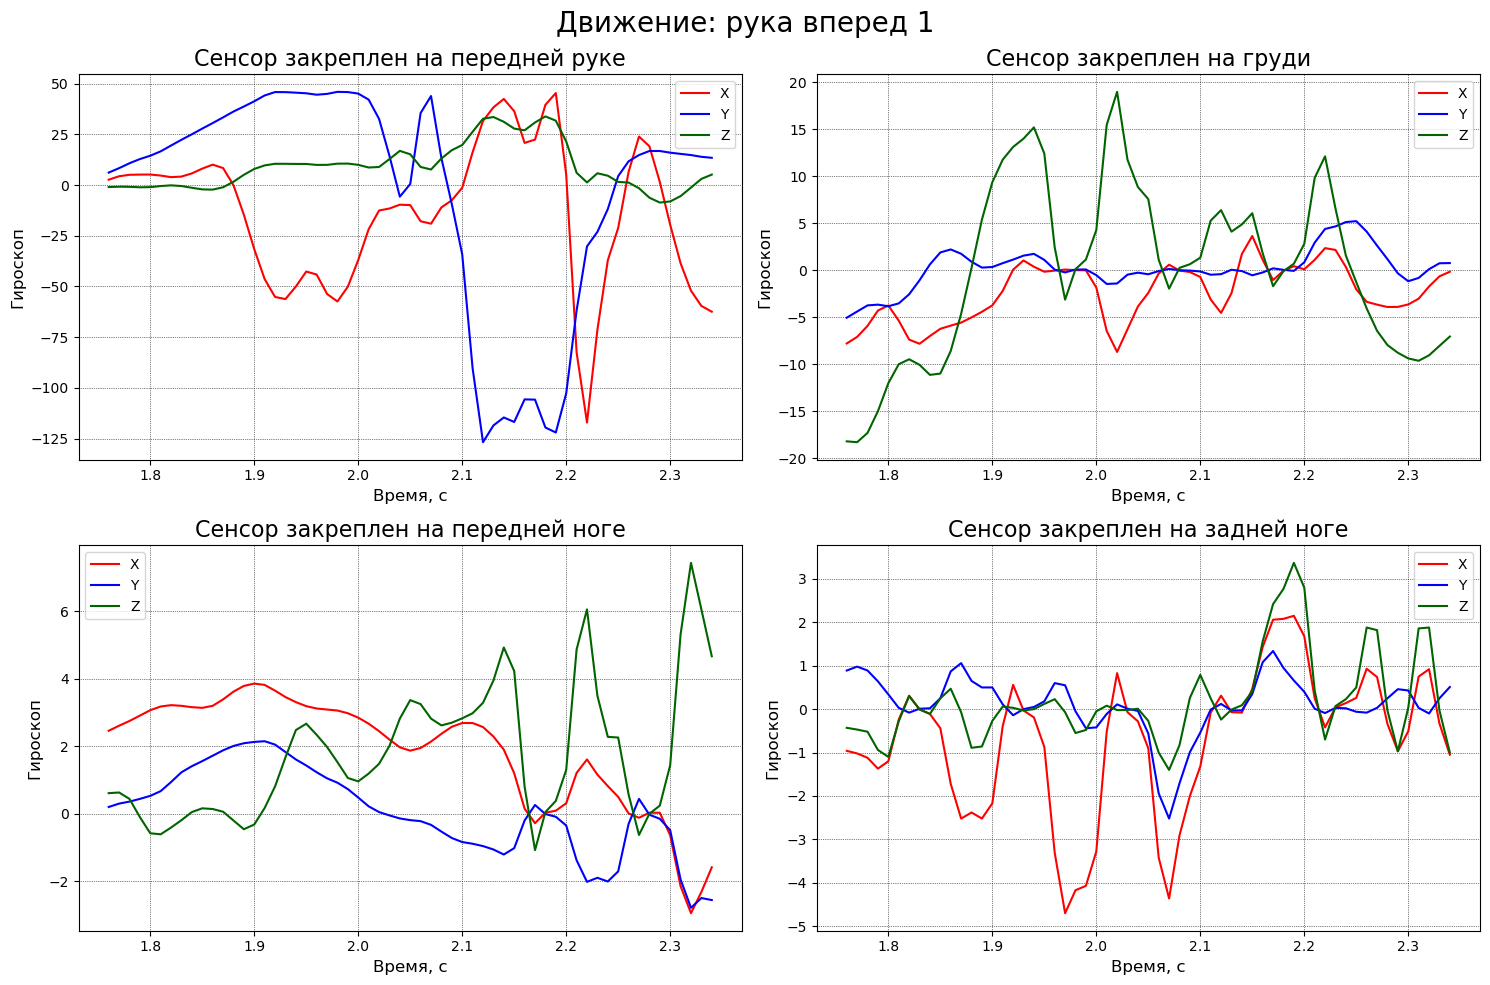

Движение: рука вперед 1. Сенсор закреплен на передней руке
+-----+------+-------+-------+------+
|     |  x   |   y   |   z   |  t   |
+-----+------+-------+-------+------+
| 176 | 2.61 | 6.11  | -1.02 | 1.76 |
| 177 | 4.31 |  8.3  | -0.83 | 1.77 |
| 178 | 5.03 | 10.71 | -0.9  | 1.78 |
| 179 | 5.13 | 12.78 | -1.13 | 1.79 |
| 180 | 5.16 | 14.42 | -1.04 | 1.8  |
+-----+------+-------+-------+------+


Движение: рука вперед 1. Сенсор закреплен на груди
+-----+-------+-------+--------+------+
|     |   x   |   y   |   z    |  t   |
+-----+-------+-------+--------+------+
| 176 | -7.8  | -5.06 | -18.21 | 1.76 |
| 177 | -7.1  | -4.4  | -18.3  | 1.77 |
| 178 | -5.93 | -3.75 | -17.31 | 1.78 |
| 179 | -4.3  | -3.67 | -15.0  | 1.79 |
| 180 | -3.76 | -3.84 | -12.02 | 1.8  |
+-----+-------+-------+--------+------+


Движение: рука вперед 1. Сенсор закреплен на передней ноге
+-----+------+------+-------+------+
|     |  x   |  y   |   z   |  t   |
+-----+------+------+-------+------+
| 176 | 2.46 |

In [5]:
all_movement_dfs = []
all_params = []
action_executed = False
# Так как данные записаны в отдельные файлы csv, то обращение изначально к ним будет по отдельности
# Создадим цикл перебора типов движений
for part in fencing_move:
    # Так как есть два типа движения, (вперед и назад) введем индекс направления:
    for way_number in range(1, 3):
        folder, way, start, stop = get_folder(part, way_number)
        dfs = creation_of_dfs(way_folder, folder)

        # Сигнал при движении рукой имеет в конце сильный скачок, поэтому наобходимо обрезать сигнал
        if part == 'Arm':
            for df in dfs:
                df.drop(index=range(2550, len(df)), inplace=True)


        # Создадим столбец времени
        t = np.arange(len(dfs[0]['x'])) / fs
        for df in dfs:
            df['t'] = t
            
        # Разделим сигнал на отдельные движения и высчитаем параметры для характеристики движения
        for i in range(len(start)):
            movement_dfs = movement(dfs, start[i], stop[i])
            all_movement_dfs.append(movement_dfs)
            # Для примера выведем график только 1 движения и данные датчиков к нему
            if not action_executed:
                plot_dfs(movement_dfs, f'{part}{way} {i+1}', body_part)
                print_dfs(movement_dfs, f'{part}{way} {i+1}', body_part)
                action_executed = True
            params = features(movement_dfs, f'{part}{way} {i+1}', body_part)
            all_params.append(params)
            
# Объединим все датафреймы в один общий датафрейм
A = pd.concat(all_params)

### Cозданный общий датафрейм содержит в себе данные о всех сделанных движениях во время исследования, а также их параметры

In [6]:
print('Количество сделанных движений, количество параметров для 1 движения: ', A.shape)
A.sample(5)

Количество сделанных движений, количество параметров для 1 движения:  (58, 8)


Отсчеты  Среднее  Стандартное отклонение  Минимум  \
Класс                                                             
рука вперед      59.0     -6.8                   122.6   -299.9   
рука вперед      58.0      3.1                   115.5   -245.2   
выпад вперед    212.0    -29.9                   351.4  -1408.5   
выпад вперед    197.0    -40.4                   363.2  -1412.1   
рука назад       39.0      2.9                   126.4   -201.3   

              25-й процентиль  Медиана  75-й процентиль  Максимум  
Класс                                                              
рука вперед             -67.0     15.0             70.0     173.2  
рука вперед             -68.4     19.6             77.0     193.7  
выпад вперед            -74.5     -0.5             58.4    1424.8  
выпад вперед            -99.3     -8.7             51.9    1412.1  
рука назад             -105.8      4.8            107.4     199.0

### Классы движений

In [7]:
unique_movements = A.index.unique().tolist()
unique_movements

['рука вперед',
 'рука назад',
 'шаг вперед',
 'шаг назад',
 'выпад вперед',
 'выпад назад']

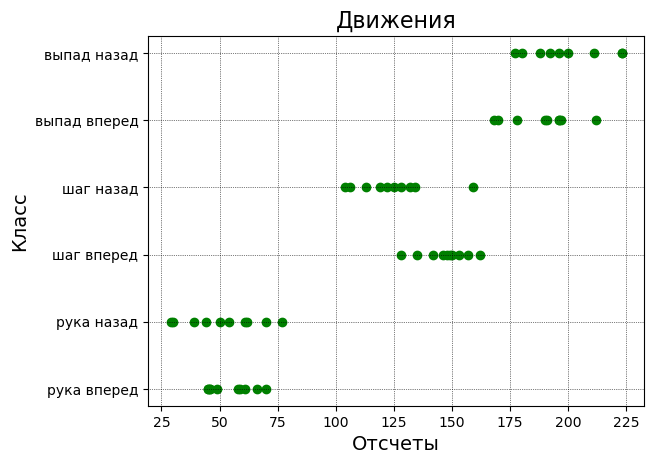

In [8]:
plt.figure()
plt.scatter(A['Отсчеты'].tolist(), A.index.tolist(), color = 'green') 
plt.xlabel('Отсчеты', fontsize=14)
plt.ylabel('Класс', fontsize=14)
plt.title('Движения', fontsize=16)
plt.grid(which='major', linewidth=0.5, linestyle=':', color='k')

# Решаем задачу классификации с учителем 

In [9]:
y = pd.DataFrame(A.index) # Целевая переменная
X = A.reset_index(drop=True)  # Матрица признаков

feature_names = ['Отсчеты',
                 'Среднее',
                 'Стандартное отклонение',
                 'Минимум',
                 '25-й процентиль',
                 'Медиана',
                 '75-й процентиль',
                 'Максимум']

In [10]:
X.head()

Отсчеты  Среднее  Стандартное отклонение  Минимум  25-й процентиль  \
0     59.0     -6.8                   122.6   -299.9            -67.0   
1     45.0     -9.5                   112.8   -222.8            -97.8   
2     45.0    -10.7                   114.2   -219.4           -112.6   
3     58.0      3.1                   115.5   -245.2            -68.4   
4     61.0     -3.5                   142.9   -263.3            -92.5   

   Медиана  75-й процентиль  Максимум  
0     15.0             70.0     173.2  
1      3.0             88.1     172.8  
2     13.1             81.0     163.5  
3     19.6             77.0     193.7  
4      3.5             71.9     269.4

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Отсчеты                 58 non-null     float64
 1   Среднее                 58 non-null     float64
 2   Стандартное отклонение  58 non-null     float64
 3   Минимум                 58 non-null     float64
 4   25-й процентиль         58 non-null     float64
 5   Медиана                 58 non-null     float64
 6   75-й процентиль         58 non-null     float64
 7   Максимум                58 non-null     float64
dtypes: float64(8)
memory usage: 3.8 KB


In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Класс   58 non-null     object
dtypes: object(1)
memory usage: 596.0+ bytes


In [13]:
y.sample(5)

Класс
39     шаг назад
47  выпад вперед
21    шаг вперед
29    шаг вперед
46  выпад вперед

### Рандомизируем выборку и разделим на тренировочную и тестовую выборки

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Стандартизируем признаки

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Решим задачу классификации методом логистической регрессии

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Создание модели логистической регрессии
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Обучение модели на обучающей выборке
lr.fit(X_train, y_train)

# Прогнозирование классов для тестовых данных
y_pred = lr.predict(X_test)

# Прогнозирование классов для тренировочных данных
y_train_pred = lr.predict(X_train)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.9


In [17]:
check_test = pd.DataFrame({
    'Фактическое': y_test['Класс'],
    'Предсказанное': y_pred.flatten(),
})

check_test.sample(10)

Фактическое Предсказанное
34     шаг назад     шаг назад
48  выпад вперед  выпад вперед
31     шаг назад     шаг назад
0    рука вперед   рука вперед
41  выпад вперед  выпад вперед
12    рука назад    рука назад
8    рука вперед   рука вперед
25    шаг вперед    шаг вперед
6    рука вперед   рука вперед
19    рука назад    рука назад

# Графики сравнения реальных и предсказанных данных

## Тестовая выборка

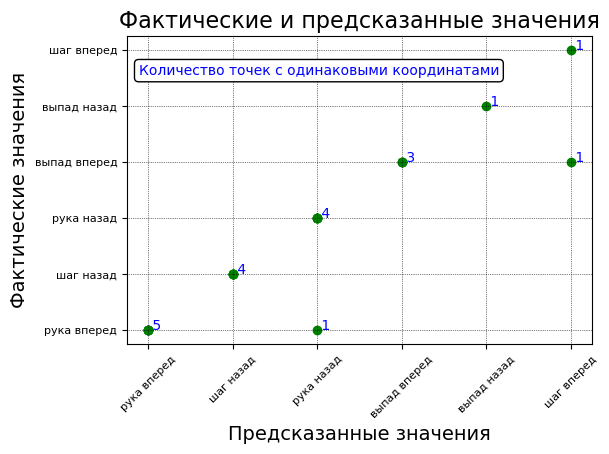

In [18]:
evaluate_preds(y_test['Класс'].tolist(), y_pred.tolist(), unique_movements)

## Тренировочная выборка

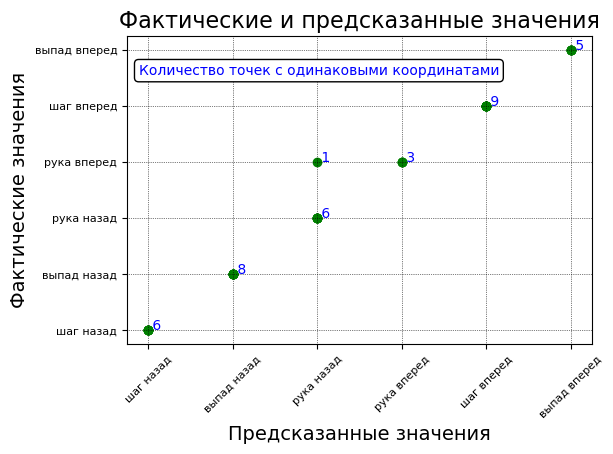

In [19]:
evaluate_preds(y_train['Класс'].tolist(), y_train_pred.tolist(), unique_movements)